# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [7]:
#import libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

(array([0.83685684, 2.13635938]), array([-1.4136581 ,  7.40962324]))

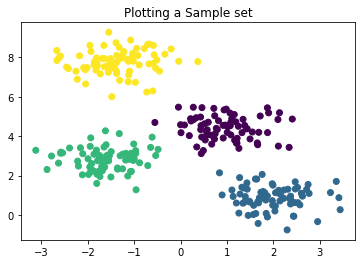

In [12]:
# 3 points

#make the dataset with make_blobs use random state 0 use 300 samples
#And plot it

# YOUR CODE HERE
X,Y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0], X[:,1], c= Y)
plt.title('Plotting a Sample set')
X[0], X[1]


In [14]:
assert X.shape== (300,2)
assert Y.shape== (300,)

### Step 2: Create the helper functions
1. Implement ```square_diff``` that takes in two vectors ```x1``` and ```x2``` and returns their squared difference. Hint: Use ```assert``` to check their lenghts match.
2. Implement ```root_sum_squared``` that takes in a vector of squaerd differences and returns the square root of the summed elements.
3. Implement ```euclidean_distances``` that takes in feature and prediction vectors and computes the distances. *Hint:* ```np.linalg.norm```, it should give the same result as the previous 2 combined.
4. Implement ```evaluate``` that takes in ```y_hat``` and ```y_true``` (classifications of the blobs)and returns the accruacy of the KNN predict function.

In [41]:
# 3 points

#implement square diff
# your code here

def square_diff(v1, v2):
    arr= np.array([(v1[0]-v2[0])**2, (v1[1]-v2[1])**2])
    return abs(arr)


In [42]:

assert square_diff(X[0],X[1]).shape==(2,) 


assert square_diff(X[0],X[0])[0]== 0
assert square_diff(X[0],X[0])[1]== 0 

assert abs(square_diff(X[0],X[1])[0] - 5.06) < 0.05
assert abs(square_diff(X[0],X[1])[1]-  27.80) < 0.05


assert abs(square_diff(X[0],X[100])[0] - 2.03) < 0.05
assert abs(square_diff(X[0],X[100])[1]-  41.96) < 0.05



assert abs(square_diff(X[200],X[256])[0]- 3.30 ) < 0.05
assert abs(square_diff(X[200],X[256])[1]- 0.09 ) < 0.05

In [57]:
# 2 points
#implement root sum squares
#your code here
def root_sum_squared(v1):
    
    sq= np.sqrt(v1[0]+v1[1])
    return sq
root_sum_squared(square_diff(X[0],X[1]))


5.733422120244678

In [58]:
v1 = root_sum_squared(square_diff(X[0],X[0]))
v2 = root_sum_squared(square_diff(X[0],X[1]))
v3 = root_sum_squared(square_diff(X[0],X[100]))
v4 = root_sum_squared(square_diff(X[200],X[256]))


assert v1 == 0
assert abs( v2 - 5.73) < 0.05
assert abs( v3 - 6.63) < 0.05
assert abs( v4 - 1.84) < 0.05

In [66]:
def euclidean_distances(v1,v2):
    dist = np.linalg.norm(v1 - v2)
    return dist
# YOUR CODE HERE


In [67]:
v1 = euclidean_distances(X[0],X[0])
v2 = euclidean_distances(X[0],X[1])
v3 = euclidean_distances(X[0],X[100])
v4 = euclidean_distances(X[200],X[256])


assert v1 == 0
assert abs( v2 - 5.73) < 0.05
assert abs( v3 - 6.63) < 0.05
assert abs( v4 - 1.84) < 0.05

In [98]:
# 3 points

#implement the evaluate function RETURN THE A VALUE BETWEEN 0 AND 1
#your code here
#This cell will be evaluated later on
def evaluate(y, y_p):
    # YOUR CODE HERE
    arr= np.array([y == y_p])
    return (np.count_nonzero(arr == True)/len(y))

evaluate(a,b)

1.0

In [99]:
a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([1,2,2])
d = np.array([2,2,2])

assert evaluate(a,b) == 1
assert 0.66 <= evaluate(a,c) <= 0.667
assert 0.33 <= evaluate(a,d) <= 0.34

### Step 3: Create the KNN prediction function
The KNN prediction function as the following steps
1. For each row in ```X``` calcuate the euclidian distance of each row to the target vector.
2. Combine the distances array with the target classifers array y.
3. Sort the array and select the k lowest pairs and get the categorical values of the k nearest and put in a list
4. Count the highest votes and update the highest voted class to y_hat

In [104]:
# 10 points
#Implement the KNN function that predicts the class for the test values using the train values
#your code here
#OUTPUT MUST BE A NP ARRAY
from sklearn.neighbors import KNeighborsClassifier


def predict(x_test, x_true, y_true, k= 5):
    # YOUR CODE HERE
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_true, y_true)
    y_pred= knn.predict(x_test)
    return y_pred


In [105]:
#1 point
from sklearn.model_selection import train_test_split
#tested with random state 0
#create the train test split test_size 0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)



In [106]:
assert x_train.shape == (240,2)
assert x_test.shape == (60,2)
assert y_train.shape == (240,)
assert y_test.shape == (60,)

In [107]:
predictions = predict(x_test,x_train, y_train, k=3)
assert predictions.shape == (60,)
assert evaluate(predictions, y_test) >= 0.95


In [108]:
# Extra point
predictions = predict(x_test,x_train, y_train, k=2)
assert predictions.shape == (60,)
assert evaluate(predictions, y_test) >= 0.95


In [109]:
print('Accuracy {:0.2f}%'.format( evaluate(predictions, y_test)*100 ))

Accuracy 100.00%
